In [24]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%run utils.ipynb

In [25]:
dos_df_path,fuzzy_df_path,attack_free_df_path=load_data_paths_from_config_to_notebooks("out_paths")

In [26]:
dos_df_pl = pl.read_csv(dos_df_path)
fuzzy_df_pl= pl.read_csv(fuzzy_df_path)
attack_free_df_pl= pl.read_csv(attack_free_df_path)

In [27]:
dos_df_pd = dos_df_pl.to_pandas()
fuzzy_df_pd=fuzzy_df_pl.to_pandas()
attack_free_df_pd=attack_free_df_pl.to_pandas()

In [28]:
attack_free_in_dos=dos_df_pd[dos_df_pd["updatedFlag"]=='R']
attack_free_in_fuzzy=fuzzy_df_pd[fuzzy_df_pd["updatedFlag"]=='R']

dos_df=dos_df_pd[dos_df_pd["updatedFlag"]=='T']
fuzzy_df=fuzzy_df_pd[fuzzy_df_pd["updatedFlag"]=='T']
attack_free_df=pd.concat([attack_free_df_pd,attack_free_in_dos,attack_free_in_fuzzy])

In [29]:
dos_df["attackType"]=1
fuzzy_df["attackType"]=2
attack_free_df["attackType"]=0


C:\Users\Naz\AppData\Local\Temp\ipykernel_26796\2067426196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df["attackType"]=1
C:\Users\Naz\AppData\Local\Temp\ipykernel_26796\2067426196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuzzy_df["attackType"]=2


In [30]:
dos_df.describe()

,updatedCanId,dlc,attackType
count,587521.0,587521.0,587521.0
mean,0.0,8.0,1.0
std,0.0,0.0,0.0
min,0.0,8.0,1.0
25%,0.0,8.0,1.0
50%,0.0,8.0,1.0
75%,0.0,8.0,1.0
max,0.0,8.0,1.0


## Common Methods

In [ ]:

top_20 = fuzzy_df["updatedCanId"].value_counts().nlargest(100).reset_index()
top_20.columns = ["updatedCanId", "count"]

plt.figure(figsize=(12, 6)) 
sns.barplot(x="updatedCanId", y="count", data=top_20, palette="viridis")

plt.xlabel("Updated Can ID", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Top 20 Updated Can IDs by Count", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [31]:
def plot_count_chart(df,column_name):
    plt.figure(figsize=(6, 4))
    
    sns.countplot(x=column_name, data=df, palette='viridis')
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [32]:
def plot_bar_chart_of_percentages(df,column_name):
    counts = Counter(df[column_name])
    categories = list(counts.keys())
    values = list(counts.values())
    
    total = sum(values)
    percentages = [value / total * 100 for value in values]
    
    plt.bar(categories, values)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Bar Chart with Percentages')

    for i, (value, pct) in enumerate(zip(values, percentages)):
        plt.text(i, value, f'{pct:.1f}%', ha='center', fontsize=15)

    plt.show()

In [33]:
def plot_pie_chart(df, column_name):
    data = Counter(df[column_name])
    key_list = list(data.keys())
    val_list = list(data.values())

    fig1, ax1 = plt.subplots(10,14)
    wedges, texts, autotexts = ax1.pie(val_list, autopct='%1.1f%%',
                                       shadow=True, startangle=90)
    ax1.legend(wedges, key_list, title="Categories", loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

### Univariate Analysis

#### Quick Analysis

In [34]:
print(dos_df.shape)
print(fuzzy_df.shape)
print(attack_free_df.shape)

(587521, 6)
(491847, 6)
(7414132, 6)


In [35]:
dos_df.head()

,datetime,updatedCanId,dlc,message,updatedFlag,attackType
1475,2016-11-03T18:39:37.000000,0,8,0000000000000000,T,1
1477,2016-11-03T18:39:37.000000,0,8,0000000000000000,T,1
1479,2016-11-03T18:39:37.000000,0,8,0000000000000000,T,1
1481,2016-11-03T18:39:37.000000,0,8,0000000000000000,T,1
1483,2016-11-03T18:39:37.000000,0,8,0000000000000000,T,1


In [36]:
fuzzy_df.head()

,datetime,updatedCanId,dlc,message,updatedFlag,attackType
1566,2016-11-03T17:55:22.000000,223,8,8cabf2267a291a0c,T,2
1567,2016-11-03T17:55:22.000000,1770,8,25109ced5b162c18,T,2
1568,2016-11-03T17:55:22.000000,765,8,3fbd68f3c34f28d4,T,2
1575,2016-11-03T17:55:22.000000,301,8,354599cf0980c777,T,2
1579,2016-11-03T17:55:22.000000,826,8,1c0486907f087ec9,T,2


In [37]:
attack_free_df.head()

,datetime,updatedCanId,dlc,message,updatedFlag,attackType
0,2016-11-14T11:03:54.000000,848,8,052884666d0000a2,R,0
1,2016-11-14T11:03:54.000000,704,8,1400000000000000,R,0
2,2016-11-14T11:03:54.000000,1072,8,0000000000000000,R,0
3,2016-11-14T11:03:54.000000,1201,8,0000000000000000,R,0
4,2016-11-14T11:03:54.000000,497,8,0000000000000000,R,0


#### updatedCanId

C:\Users\Naz\AppData\Local\Temp\ipykernel_26796\220639861.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette='viridis')


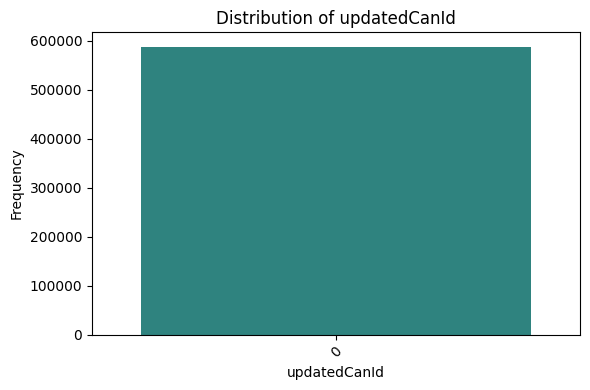

In [38]:
plot_count_chart(dos_df,"updatedCanId")

In [39]:
fuzzy_df["updatedCanId"].nunique()

2048

C:\Users\Naz\AppData\Local\Temp\ipykernel_26796\1954055786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="updatedCanId", y="count", data=top_20, palette="viridis")


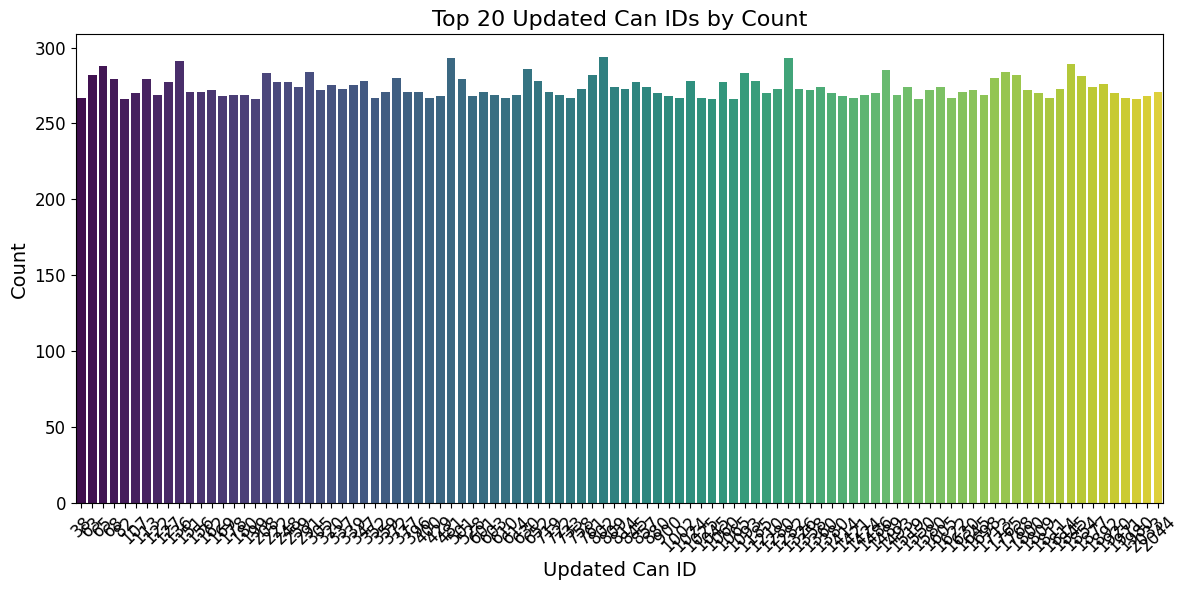

In [ ]:

top_20 = fuzzy_df["updatedCanId"].value_counts().nlargest(100).reset_index()
top_20.columns = ["updatedCanId", "count"]

plt.figure(figsize=(12, 6)) 
sns.barplot(x="updatedCanId", y="count", data=top_20, palette="viridis")

plt.xlabel("Updated Can ID", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Top 20 Updated Can IDs by Count", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [41]:
top_20

,updatedCanId,count
0,802,294
1,1282,293
2,481,293
3,136,291
4,1845,289
...,...,...
95,1065,266
96,1980,266
97,1045,266
98,1550,266
